<a href="https://colab.research.google.com/github/Benbuk/GOMYCODE_DS_Bootcamp/blob/main/Decision_Tree_and_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective

In this checkpoint, we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods.

Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

[➡️ Dataset link ](https://drive.google.com/file/d/13hQ-46e6Q7zvLgx8jmQ2R_HwcvKjhpCA/view)

https://i.imgur.com/hv2Ynyn.jpg

➡️ Columns explanation

Instructions

Part1: supervised learning

1. Import you data and perform basic data exploration phase
2. Display general information about the dataset

>>Create a pandas profiling reports to gain insights into the dataset

>>Handle Missing and corrupted values

>>Remove duplicates, if they exist

>>Handle outliers, if they exist

>>Encode categorical features

3. Prepare your dataset for the modelling phase
4. Apply Decision tree, and plot its ROC curve
5. Try to improve your model performance by changing the model hyperparameters

Part2: unsupervised learning

1. Drop out the target variable
2. Apply K means clustering and plot the clusters
3. Find the optimal K parameter
4. Interpret the results

#1.0 Importing the Dataset and Expolring it

##1.1 Data importation

In [ ]:
!pip install Ydata_profiling
from ydata_profiling import ProfileReport

import pandas as pd

  Using cached ydata_profiling-4.6.5-py2.py3-none-any.whl (357 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (686 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached multimethod-1.11.2-py3-none-any.whl (10 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
#importing the dataset
data = pd.read_csv("/content/Microsoft_malware_dataset_min.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB
None


##1.2 Data Exploration

In [ ]:
data.head()

HasDetections  Wdft_IsGamer  Census_IsVirtualDevice Census_OSEdition  \
0              0           0.0                     0.0     Professional   
1              0           0.0                     0.0     Professional   
2              0           0.0                     0.0             Core   
3              1           0.0                     0.0     Professional   
4              1           0.0                     0.0             Core   

   Census_HasOpticalDiskDrive  Firewall  SMode  IsProtected  \
0                           0       1.0    0.0          1.0   
1                           0       1.0    0.0          1.0   
2                           0       1.0    0.0          1.0   
3                           0       1.0    0.0          1.0   
4                           0       1.0    0.0          1.0   

  OsPlatformSubRelease  CountryIdentifier  
0                  rs4                 29  
1                  rs4                 93  
2                  rs4                 86  
3                  rs4                 88  
4                  rs4                 18

In [ ]:
data.nunique()

HasDetections                   2
Wdft_IsGamer                    2
Census_IsVirtualDevice          2
Census_OSEdition               19
Census_HasOpticalDiskDrive      2
Firewall                        2
SMode                           2
IsProtected                     2
OsPlatformSubRelease            9
CountryIdentifier             221
dtype: int64

In [ ]:
data.duplicated().sum()

79581

  >**Note:** The are 79581 is about 80% of the entire dataset. Observing the rows, there is a possibility the windows machine simply had the value for the selected columns, i.e, smode, isprotected, has firewall etc.

In [ ]:
data_profile = ProfileReport(data, title ="Data Profiling")

data_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [ ]:
data.duplicated().sum()

79581

##1.3 Data preparation

### 1.3.1 Removing all missing values

In [ ]:
#Handle missing values
data = data.dropna(axis=0, how='any')

#drop duplicated rows
#data = data.drop_duplicates()

#shpe of the dataset
data.shape

(89447, 10)

###1.3.2 Transforming categorical variables

In [ ]:
# Transform 'counter_type' feature to a numeric variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder

data['Census_OSEdition'] = LabelEncoder().fit_transform(data['Census_OSEdition'])
data['OsPlatformSubRelease'] = LabelEncoder().fit_transform(data['OsPlatformSubRelease'])
data

<ipython-input-11-d8b80ef460bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Census_OSEdition'] = LabelEncoder().fit_transform(data['Census_OSEdition'])
<ipython-input-11-d8b80ef460bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OsPlatformSubRelease'] = LabelEncoder().fit_transform(data['OsPlatformSubRelease'])


HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  Census_OSEdition  \
0                  0           0.0                     0.0                11   
1                  0           0.0                     0.0                11   
2                  0           0.0                     0.0                 1   
3                  1           0.0                     0.0                11   
4                  1           0.0                     0.0                 1   
...              ...           ...                     ...               ...   
99994              1           0.0                     0.0                11   
99995              0           0.0                     0.0                 1   
99996              1           0.0                     0.0                11   
99997              0           0.0                     0.0                11   
99999              0           0.0                     0.0                 1   

       Census_HasOpticalDiskDrive  Firewall  SMode  IsProtected  \
0                               0       1.0    0.0          1.0   
1                               0       1.0    0.0          1.0   
2                               0       1.0    0.0          1.0   
3                               0       1.0    0.0          1.0   
4                               0       1.0    0.0          1.0   
...                           ...       ...    ...          ...   
99994                           0       1.0    0.0          1.0   
99995                           0       1.0    0.0          1.0   
99996                           1       1.0    0.0          1.0   
99997                           0       1.0    0.0          1.0   
99999                           0       1.0    0.0          1.0   

       OsPlatformSubRelease  CountryIdentifier  
0                         4                 29  
1                         4                 93  
2                         4                 86  
3                         4                 88  
4                         4                 18  
...                     ...                ...  
99994                     3                177  
99995                     5                177  
99996                     4                206  
99997                     3                 93  
99999                     1                 50  

[89447 rows x 10 columns]

#2.0 Supervised Learning - Decision Tree

##2.1 Selecting features and Splitting the dataset



In [ ]:
# Define features (x) and target variable(y)
X = data.drop('HasDetections', axis = 1)
y = data['HasDetections']


#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)



##2.2 Running the model and plotting the ROC curve

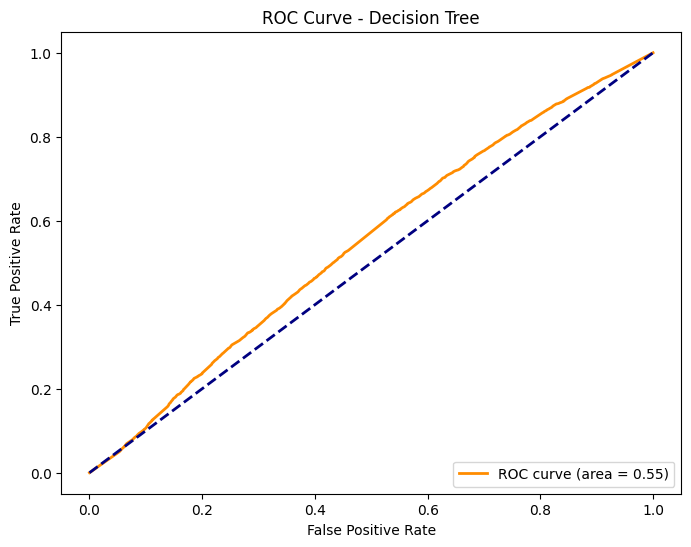

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#create and train the Decision Tree model
data_model = DecisionTreeClassifier()
data_model.fit(X_train, y_train)

#Predict probabilities for the positive class
y_probs = data_model.predict_proba(X_test)[:,1]


#compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

>*The Area Under the Curve (AUC) has a value of 0.55 which implies that this model did not perform better than any other random classification.*

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#Predict the target variable on the test set
y_pred = data_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.54      0.53      8810
           1       0.54      0.53      0.54      9080

    accuracy                           0.53     17890
   macro avg       0.53      0.53      0.53     17890
weighted avg       0.54      0.53      0.53     17890



## 2.4 Using hyperparameters to improve the model

In [ ]:
# Example: Tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
improved_model = grid_search.best_estimator_

In [ ]:
#improved model parameters
improved_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

## 2.5 Improved model result

In [ ]:
#Improving the model
# Use the best_params to create a new DecisionTreeClassifier
best_dt_model = DecisionTreeClassifier(**best_params)

# Train the model with the training data
best_dt_model.fit(X_train, y_train)

# Evaluate the performance on the testing data
y_pred = best_dt_model.predict(X_test)

# Assess the model's performance (e.g., using accuracy, precision, recall, F1 score)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.49      0.51      8810
           1       0.55      0.60      0.57      9080

    accuracy                           0.54     17890
   macro avg       0.54      0.54      0.54     17890
weighted avg       0.54      0.54      0.54     17890



>*Using hyperparameters slightly improved the accuracy of the model by 0.01*

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0840634 to fit



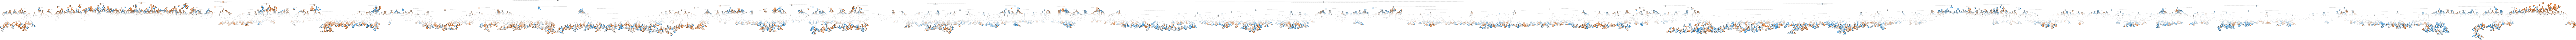

In [ ]:
#Visualize the decision tree (install graphviz and pydotplus)
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(data_model, out_file=None,
                           feature_names=X.columns,
                           class_names=['class_0', 'class_1'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#3.0 Unsupervised Learning Using K-means

>>K-means clustering is not suitable for a binary classification problem like virus detection (HasDetections) where the target variable has two possible outcomes (0 and 1). K-means is an unsupervised clustering algorithm, and its objective is to group similar data points into clusters based on their feature similarity. It does not perform binary classification.

>>For binary classification tasks with labeled data, it is more appropriate to use supervised learning algorithms, such as logistic regression, decision trees, random forests, support vector machines, or neural networks. These algorithms are designed to learn a mapping from input features to a binary output based on labeled training data